## installing depedencies

In [1]:
!pip3 install seaborn

In [2]:
import pandas as pd

students = pd.read_json('data/students.json')
courses  = pd.read_json('data/courses.json')

## registring the students in the course

In [3]:
import numpy as np

# Creating "enrollment variable" -> this is the courses amount for each student 
students['enrollment'] = np.ceil(np.random.exponential(size = len(students)) * 1.5).astype(int)
students['enrollment'].describe()

count    40.000000
mean      2.225000
std       1.510434
min       1.000000
25%       1.000000
50%       2.000000
75%       3.000000
max       7.000000
Name: enrollment, dtype: float64

In [4]:
students.head()

,nome,studentsID,domain,email,enrollment
0,MARIA,30,@serviceemail.com,maria@serviceemail.com,2
1,ANA,33,@serviceemail.com,ana@serviceemail.com,3
2,FRANCISCA,23,@domainemail.com.br,francisca@domainemail.com.br,3
3,ANTONIA,27,@serviceemail.com,antonia@serviceemail.com,4
4,ADRIANA,20,@serviceemail.com,adriana@serviceemail.com,1


## Using seaborn

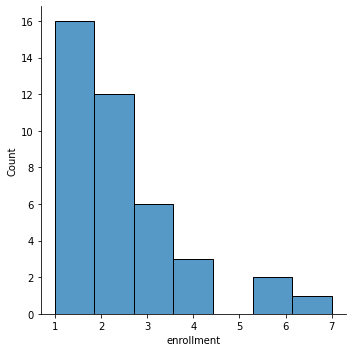

In [5]:
import seaborn as sns

sns.displot(students['enrollment'])

In [6]:
students['enrollment'].value_counts()

1    16
2    12
3     6
4     3
6     2
7     1
Name: enrollment, dtype: int64

## Selecting courses

In [7]:
students.sample(5)

,nome,studentsID,domain,email,enrollment
20,JOSE,2,@serviceemail.com,jose@serviceemail.com,1
18,VANESSA,11,@serviceemail.com,vanessa@serviceemail.com,1
33,DANIEL,16,@domainemail.com.br,daniel@domainemail.com.br,4
21,JOAO,8,@serviceemail.com,joao@serviceemail.com,2
15,LETICIA,4,@serviceemail.com,leticia@serviceemail.com,2


In [8]:
all_enrollments = [] # variable for all courses
x = np.random.rand(20) # array with 20 numbers randons
prob = x / sum(x) # variable with the probability

In [9]:
"""
    This "for" works for fill the "all_enrollments" variable with the relation between students and yours courses  
    - iterrows() -> Mode for iterate in each row
""" 


for index, row in students.iterrows():
    id = row.studentsID
    enrollments = row.enrollment
    for i in range(enrollments):
        enrollment = [id, np.random.choice(courses.index, p = prob)]
        all_enrollments.append(enrollment)
        
# creating dataframe with "all_enrollments" variable filled
enrollments = pd.DataFrame(all_enrollments, columns = ['studentsID', 'coursesID'])

In [10]:
enrollments.head()

,studentsID,coursesID
0,30,3
1,30,15
2,33,7
3,33,7
4,33,14


In [11]:
# Creating a new DataFrame with the students mount for each course
# Here was used .groupby and .count for realize the operation
# and was used .join for create a variable with course description

enrollments_per_course = enrollments.groupby('coursesID').count().join(courses['courses_name']).rename(
    columns={
        'studentsID': 'number of students'
    }
)

enrollments_per_course.head()

,number of students,courses_name
coursesID,,
1,3,Lógica de programação
2,3,Java para Web
3,9,C# para Web
4,1,Ruby on Rails
5,6,Cursos de Python


## Exporting 

In [12]:
enrollments.to_json('data/enrollments.json')
enrollments_per_course.to_json('data/enrollments_per_course.json')